In [1]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

# 1. Загрузка данных

In [2]:
data = pd.read_csv('D:/Downloads/heart.csv')


# 2. Подготовка данных


In [3]:
data = pd.get_dummies(data, drop_first=True)

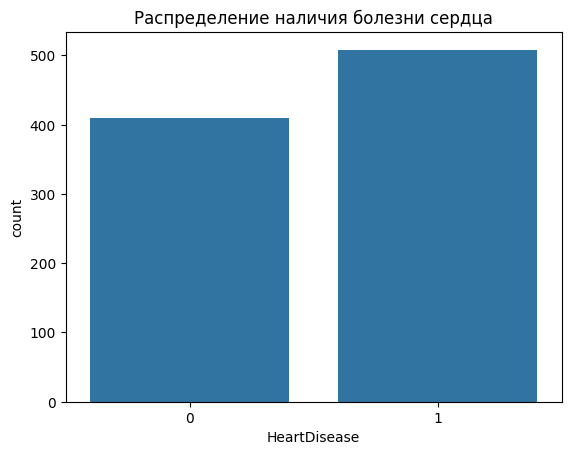

In [4]:
sns.countplot(x='HeartDisease', data=data)
plt.title('Распределение наличия болезни сердца')
plt.show()

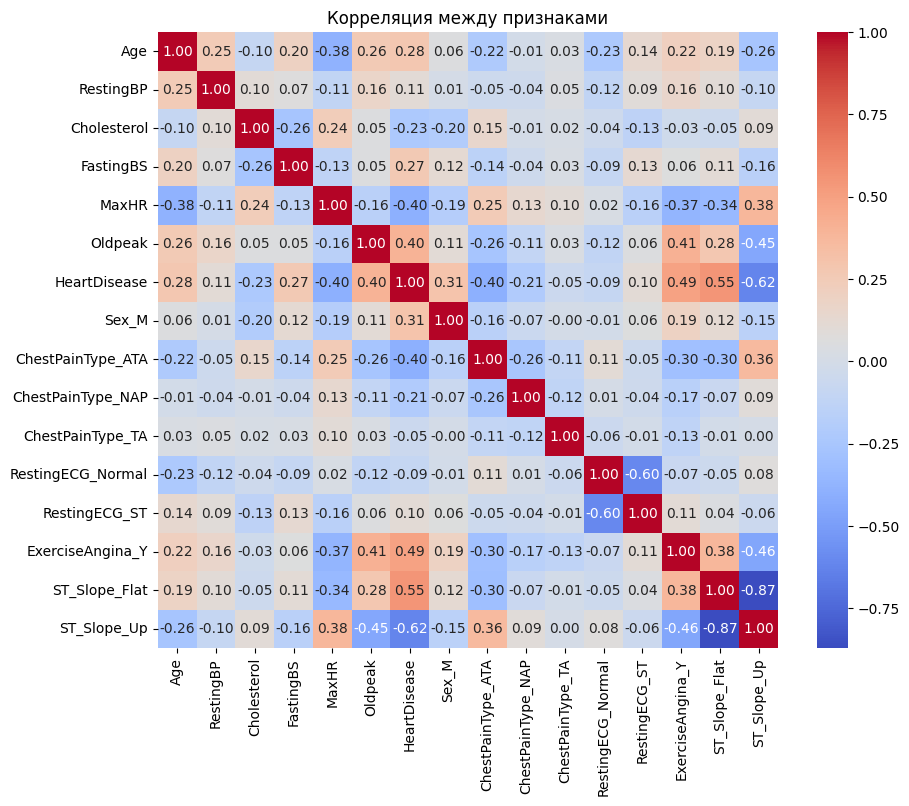

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция между признаками')
plt.show()

# 3. Разделение выборки

In [6]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение моделей

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [8]:
print("Decision Tree metrics:")
print(classification_report(y_test, y_pred_dt))

Decision Tree metrics:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [10]:
print("Random Forest metrics:")
print(classification_report(y_test, y_pred_rf))

Random Forest metrics:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# 5. Важность признаков

In [11]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


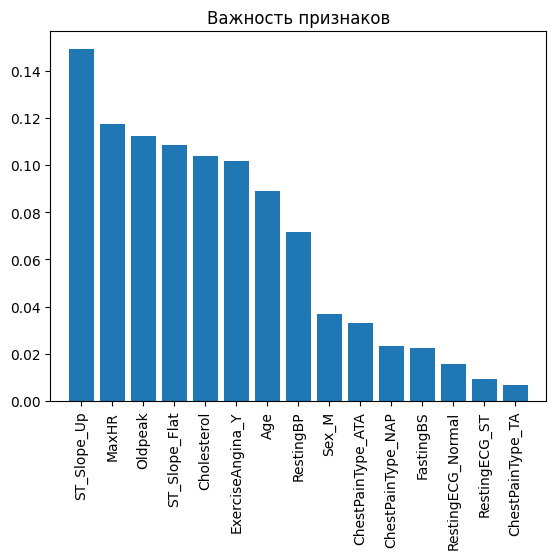

In [12]:
plt.figure()
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 6. Бэггинг

In [13]:
bagging_model = BaggingClassifier(estimator=dt_model, random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

In [14]:
print("Bagging metrics:")
print(classification_report(y_test, y_pred_bagging))

Bagging metrics:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        77
           1       0.87      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



# 7. Стекинг

In [15]:
estimators = [
    ('dt', dt_model),
    ('rf', rf_model),
    ('svc', LinearSVC(random_state=42))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)

In [16]:
print("Stacking metrics:")
print(classification_report(y_test, y_pred_stacking))

Stacking metrics:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        77
           1       0.88      0.79      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



# Выводы

Random Forest показал наилучшие результаты по всем метрикам, включая точность (accuracy = 0.88), что делает его наиболее надежной моделью для данной задачи.
Decision Tree также продемонстрировало хорошие результаты, но уступает Random Forest в точности и F1-score.
Bagging показал наименьшие результаты среди всех моделей, особенно по метрике precision для здоровых пациентов (0), что указывает на его недостаточную способность правильно классифицировать отрицательные случаи.
Stacking показал результаты, близкие к Decision Tree, но не смог превзойти Random Forest.

Наилучшей моделью в данной задаче является Random Forest. 
Высокая точность: Random Forest достигла наивысшей точности (0.88), что указывает на ее способность правильно классифицировать как положительные, так и отрицательные случаи.
Сбалансированность метрик: Модель продемонстрировала высокие значения precision и recall для больных и здоровых пациентов, что говорит о ее надежности и способности минимизировать как ложные срабатывания, так и пропуски.
Устойчивость к переобучению: Random Forest, как ансамблевая модель, менее подвержена переобучению по сравнению с одиночными деревьями решений, что делает ее более универсальной для различных наборов данных.